<a href="https://colab.research.google.com/github/Arhamkazi123/Placement-ML-model/blob/main/Machine_Learning_Placement_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/modified_placement_data.csv')
data

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No
...,...,...,...
95,"4,3",200.0,No
96,"4,4",42.0,No
97,"6,7",182.0,Yes
98,"6,3",103.0,Yes


In [ ]:
data['cgpa']=data['cgpa'].str.replace(',','.')
data['placement']=data['placement'].map({'Yes':1,"No":0})
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
data=data.dropna(subset='cgpa')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         95 non-null     float64
 2   placement  95 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


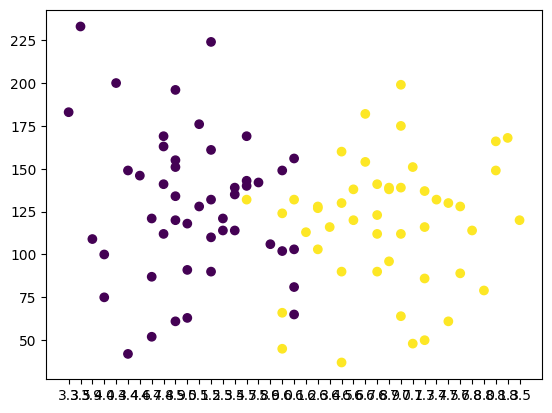

In [ ]:
import matplotlib.pyplot as plt
data=data.sort_values(by='cgpa')
plt.scatter(data['cgpa'],data['iq'],c=data['placement'])

#Creating and Training a model


In [ ]:
X=data.iloc[:,0:2]
Y=data.iloc[:,-1]
X

,cgpa,iq
17,3.3,183.0
50,3.5,233.0
31,3.9,109.0
18,4.0,100.0
68,4.0,75.0
...,...,...
58,8.0,79.0
65,8.1,166.0
37,8.1,149.0
53,8.3,168.0


In [ ]:
Y

,placement
17,0
50,0
31,0
18,0
68,0
...,...
58,1
65,1
37,1
53,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
31,3.9,109.0
55,7.8,114.0
41,5.4,114.0
26,7.0,199.0
48,6.6,138.0
...,...,...
46,5.3,114.0
87,5.7,132.0
90,7.3,86.0
74,6.7,154.0


In [ ]:
y_train

,placement
31,0
55,1
41,0
26,1
48,1
...,...
46,0
87,1
90,1
74,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-1.83783449, -0.31547276],
       [ 1.57528671, -0.19005094],
       [-0.52509557, -0.19005094],
       [ 0.87515928,  1.94211994],
       [ 0.52509557,  0.41197378],
       [ 0.08751593, -1.41918474],
       [-1.75031856, -0.54123203],
       [ 0.26254778,  0.13604578],
       [-0.70012742,  0.2614676 ],
       [-0.96267521,  1.86686685],
       [ 0.43757964, -2.12154691],
       [-1.05019114,  1.18958904],
       [ 0.        ,  0.06079269],
       [-0.70012742, -0.29038839],
       [ 0.70012742, -0.79207566],
       [-0.26254778,  1.18958904],
       [-0.87515928, -0.7669913 ],
       [-1.75031856, -1.16834111],
       [ 0.43757964, -0.79207566],
       [-0.96267521,  0.83840795],
       [-0.6126115 , -0.0144604 ],
       [ 0.87515928, -0.24021967],
       [-0.70012742,  0.98891413],
       [ 0.87515928,  1.34009522],
       [ 0.        , -1.39410038],
       [-0.17503186,  0.51231123],
       [ 2.1878982 , -0.03954476],
       [-0.08751593, -0.39072585],
       [ 0.78764335,

In [ ]:
X_test

array([[ 0.35006371, -0.13988221],
       [-1.13770706, -1.74528146],
       [ 0.08751593,  0.2614676 ],
       [ 0.87515928,  0.43705814],
       [-1.40025485,  0.68790177],
       [-1.48777078,  1.9672043 ],
       [ 1.83783449,  1.11433595],
       [ 0.26254778,  0.16113015],
       [-1.05019114,  1.03908286],
       [ 0.70012742,  0.48722687]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
y_test

,placement
13,1
94,0
71,1
32,1
88,0
95,0
65,1
63,1
34,0
43,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<Axes: >

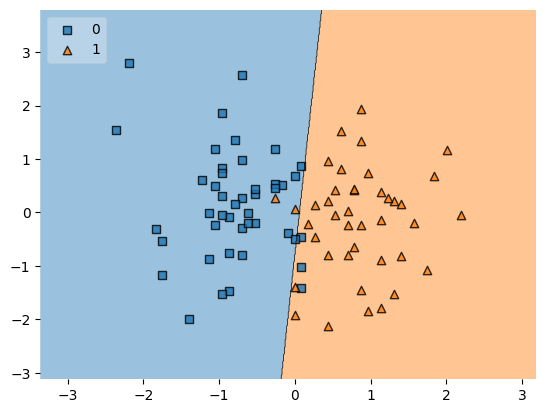

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [86]:
#Predicting new output
new_data = pd.DataFrame([[6.7, 115]], columns=['cgpa', 'iq'])

new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)

print(prediction)


[1]
